In [1]:
import pandas as pd
listings_df=pd.read_csv('listings-2.csv', index_col=None)

In [3]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [26]:
calendar_df=pd.read_csv('calendar.csv')
calendar_df.head()

,listing_id,date,available,price
0,2515,2019-07-05,t,$89.00
1,2515,2019-07-04,t,$89.00
2,2515,2019-07-03,t,$89.00
3,2515,2019-07-02,t,$89.00
4,2515,2019-07-01,t,$89.00


In [27]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466710 entries, 0 to 17466709
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 533.0+ MB


In [29]:
reviews_df=pd.read_csv('reviews.csv')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [30]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [35]:
def clean_df(listings, calendar, reviews):

# Convert string of prices to floats
    listings.price=listings.price.str.replace('$','')
    listings.price=listings.price.str.replace(',','').astype(float)

    listings.weekly_price=listings.weekly_price.str.replace('$','')
    listings.weekly_price=listings.weekly_price.str.replace(',','').astype(float)

    listings.monthly_price=listings.monthly_price.str.replace('$','')
    listings.monthly_price=listings.monthly_price.str.replace(',','').astype(float)

    listings.security_deposit=listings.security_deposit.str.replace('$','')
    listings.security_deposit=listings.security_deposit.str.replace(',','').astype(float)

    listings.cleaning_fee=listings.cleaning_fee.str.replace('$','')
    listings.cleaning_fee=listings.cleaning_fee.str.replace(',','').astype(float)

    listings.extra_people=listings.extra_people.str.replace('$','')
    listings.extra_people=listings.extra_people.str.replace(',','').astype(float)

    calendar.price = calendar.price.str.replace('$','')
    calendar.price = calendar.price.str.replace(',','').astype(float)

    # Convert string of pecentages to floats
    listings.host_response_rate = listings.host_response_rate.str.replace('%','')
    listings.host_response_rate = listings.host_response_rate.astype(float)

    listings.host_acceptance_rate = listings.host_acceptance_rate.str.replace('%','')
    listings.host_acceptance_rate = listings.host_acceptance_rate.astype(float)

    # Convert date string to datetime
    reviews['date'] = pd.to_datetime(reviews['date'], format='%Y-%m-%d')
    calendar['date'] = pd.to_datetime(calendar['date'], format='%Y-%m-%d')
    
    return listings, calendar, reviews

In [37]:
# clean the dataframes
clean_listings, clean_calendar, clean_reviews = clean_df(listings, calendar, reviews)

In [39]:
import matplotlib.pyplot as plt

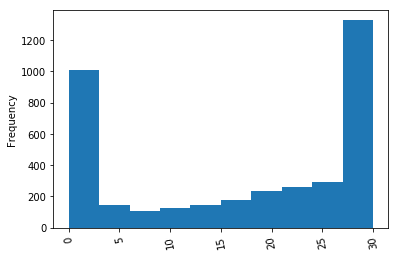

In [40]:
listings['availability_30'].plot(kind='hist', rot=100)
plt.show()

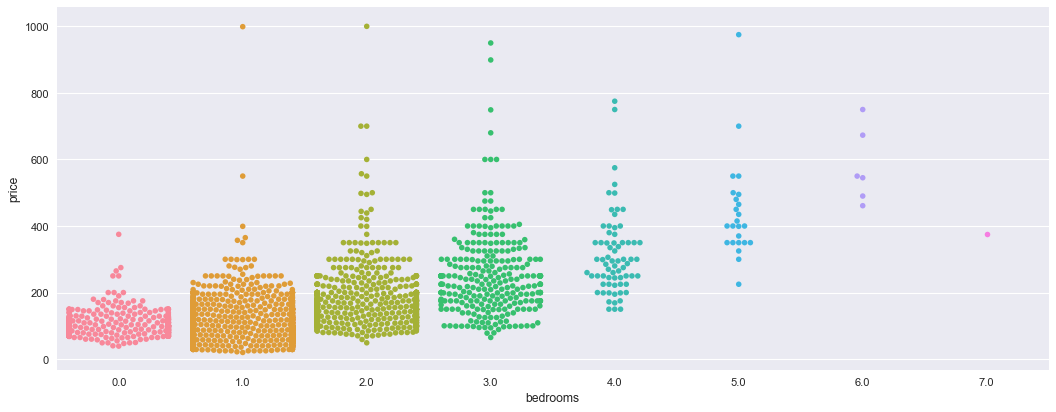

In [62]:
import seaborn as sns
sns.set()
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
_=sns.swarmplot(x='bedrooms', y='price', data=clean_listings)
plt.show()

It is obvious that the more rooms there are the higher the price is. But it is also interesting to see:
1. 7-bedroom listing is price lower than most 6-bedroom listing. Is that an outlier?
2. 1-bedroom listing starts at a lower point than 0-bedroom listing.
3. Listings priced above $800 can be outliers?

In [64]:
clean_listings['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

The most popular listings are house, and apartments.

In [65]:
clean_listings['bedrooms'].value_counts()

1.0    2417
2.0     640
0.0     372
3.0     283
4.0      69
5.0      24
6.0       6
7.0       1
Name: bedrooms, dtype: int64

The most popular size is 1 bedroom.

In [66]:
clean_listings['accommodates'].value_counts()

2     1627
4      785
3      398
6      332
1      256
5      184
8      119
7       52
10      25
12      15
9       13
16       4
11       3
14       3
15       2
Name: accommodates, dtype: int64

Varies from 1 to 16, and the most popular is for 2 people.

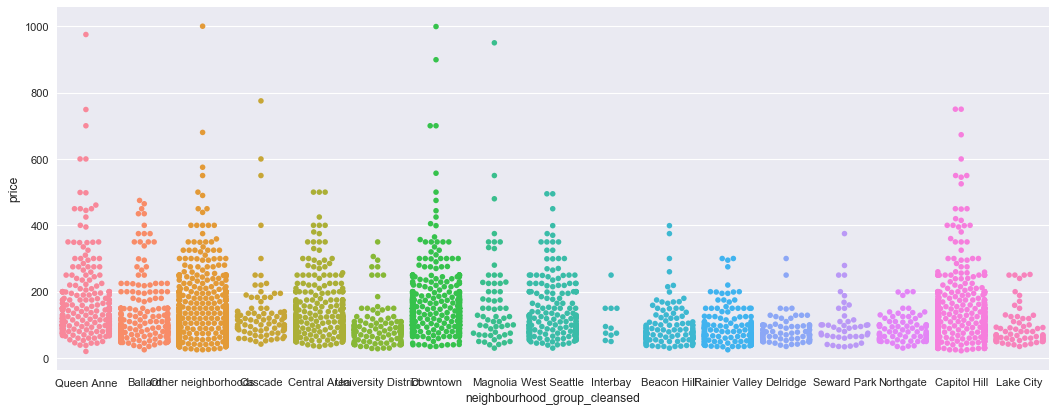

In [59]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
_=sns.swarmplot(x='neighbourhood_group_cleansed', y='price', data=clean_listings)
plt.show()

Listings in Queen Anne, Central, Downtown, West Seattle and Capital Hill are the higher priced neighborhood.

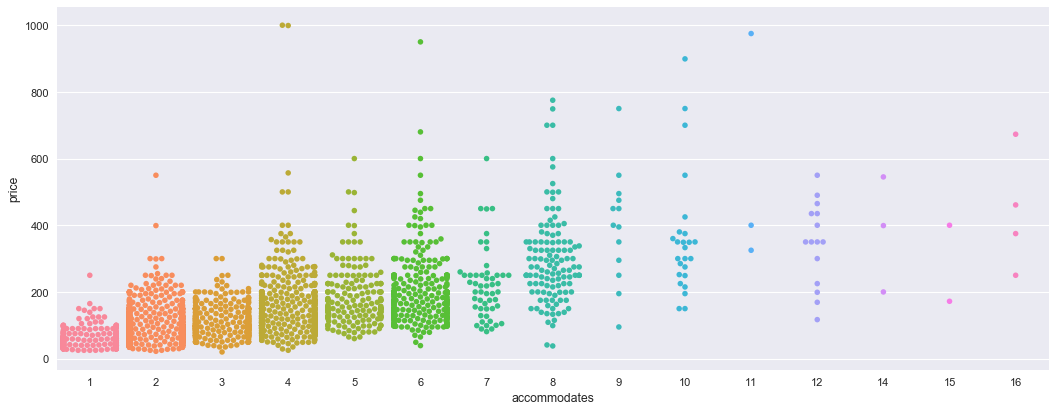

In [61]:
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
_=sns.swarmplot(x='accommodates', y='price', data=clean_listings)
plt.show()

Similarly to number of bedrooms, the more a listing can accommodates, the higher the price. There are, however, certain things to notice:
1. Listings over 9 people aren't priced higher, but tends to be lower than listings for 8. It seems 8 is the threshold.
2. Evens seem be priced higher than odds.

Let's see how dynamic is the airbnb scene in Seattle. 

First we can check the highest listings per host.


In [79]:
clean_listings['host_total_listings_count'].max()

502.0

This means that hosts are using airbnb as their business platforms in Seattle. 
We would be expecting a dynamic scene.

Our assumptions: every booking will write a review, minimum nights are the average lenghth of stays at each listing.
OCCUPANCY RATE: (numbers of reviews * minimum nights) / availability_365
REVENUE: (numbers of reviews * minimum nights) * price